In [1]:
print('')

aim to plot change in gradient as consider changing minimum magntiude of data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import pandas as pd

import scipy
from tabulate import tabulate

import matplotlib
matplotlib.rcParams.update({'font.size': 20})

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from data_plotting_func_min_dist import *
# from spearman_plotting_func import *

change magnitude limits, colors in functions file

In [5]:
filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
            'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20']
#,
'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_005_new',
              'eq_object_03s_bandpass_01_19_snr_20_blank_01_new']'''

'''filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr5',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr5',
              'eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr20',
             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_01_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_025_new_snr20',
              'eq_object_4s_bandpass_01_19_snr_20_blank_05_new_snr20']'''

"filenames = ['eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_03s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_05s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_0_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_005_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_01_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_025_new_snr5',\n             'eq_object_1s_bandpass_01_19_snr_20_blank_05_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_0_new_snr5',\n              'eq_object_4s_bandpass_01_19_snr_20_blank_005_new_snr5',\n        

## colored points and grey points

In [6]:
%matplotlib inline
min_dist = 20
max_dist = 200

for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for min_dist in [0]: #range(0, 50):
        for n_stations in [0]: #range(0, 6, 1):
            x_tp, y_tp = calc_tp_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
            x_pgd, y_pgd = calc_pgd_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
            x_tc, y_tc = calc_tc_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)
            x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3.,n=n_stations, min_dist = min_dist, max_dist = max_dist)

            plot_data_subplots([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f,n=n_stations, min_dist = min_dist, max_dist = max_dist, save=True)
            plot_data_subplots_grey([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f,n=n_stations, min_dist = min_dist, max_dist = max_dist, save=True)


eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


## lines at m3+ and m>window length

eq_object_03s_bandpass_01_19_snr_20_blank_0_new_snr20


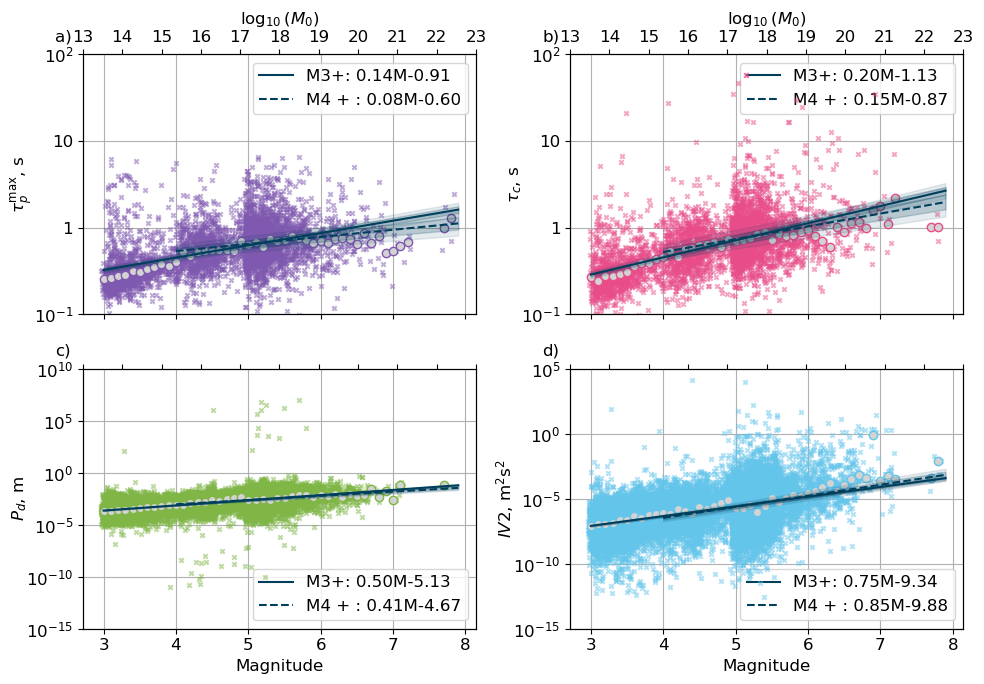

KeyboardInterrupt: 

In [13]:
%matplotlib inline
min_dist = 20
max_dist = 200
n_stations = 0
for f in filenames[0:1]:
    print(f)
    df = pd.read_pickle(f'/home/earthquakes1/homes/Rebecca/phd/data/results_database/{f}')
    for min_dist in range(0, 50, 10):
        options = {'n': n_stations, 'min_dist': min_dist, 'max_dist': max_dist}
        x_tp, y_tp = calc_tp_mag_lim(df, 3., **options)
        x_pgd, y_pgd = calc_pgd_mag_lim(df, 3., **options)
        x_tc, y_tc = calc_tc_mag_lim(df, 3., **options)
        x_iv2, y_iv2 = calc_iv2_mag_lim(df, 3., **options)

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tp_mag_lim(df, mag_lim, **options)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        tp_params = [gradt, gradt_std, intercept, intercept_std,  'tp']
        tp_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_pgd_mag_lim(df, mag_lim, **options)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        pgd_pearson = pearson
        pgd_params = [gradt, gradt_std, intercept, intercept_std,  'pgd']

        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_tc_mag_lim(df, mag_lim, **options)
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        #plot_spearman_subplots(f, gradt, gradt_std, spearman, spearman_p, n, 'pgd', True)
        tc_params = [gradt, gradt_std, intercept, intercept_std, 'tc']
        tc_pearson = pearson
        gradt, intercept, gradt_std, intercept_std = [],[],[],[]
        pearson = []
        spearman = []
        spearman_p = []
        n_l = []

        for mag_lim in magnitudes:
            x, y = calc_iv2_mag_lim(df, mag_lim, **options)
            #print(len(x[y==0]))
            gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n = calc_opt(x,y, gradt, intercept, gradt_std, intercept_std, pearson, spearman, spearman_p, n_l)
        iv2_params = [gradt, gradt_std, intercept, intercept_std, 'iv2']
        iv2_pearson = pearson

        plot_data_subplots_line([x_tp, x_pgd, x_tc, x_iv2], [y_tp, y_pgd, y_tc, y_iv2], ['tp','pgd','tc','iv2'],f, tp_params, pgd_params, tc_params, iv2_params, n = n_stations, min_dist = min_dist, max_dist = max_dist, save = False, show = True, hyp = True)

